In [26]:
import pandas as pd
import numpy as np
import seaborn as sns


df = pd.read_csv("burma14extend.csv")
clean = df.dropna()
clean.loc[:,'delta'] = clean.loc[:,'distance'] - 3323
clean.loc[:,'%delta'] = clean.loc[:,'delta']/3323
#clean.describe()


/home/salesbarbosa/anaconda3/lib/python3.4/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/salesbarbosa/anaconda3/lib/python3.4/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#EAEAF2
#EAEAF2
#EAEAF2
#EAEAF2
#EAEAF2
#EAEAF2


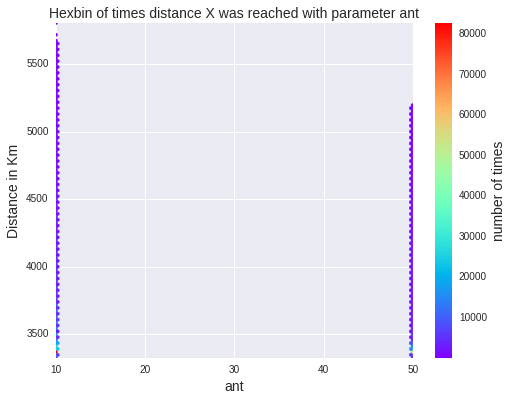

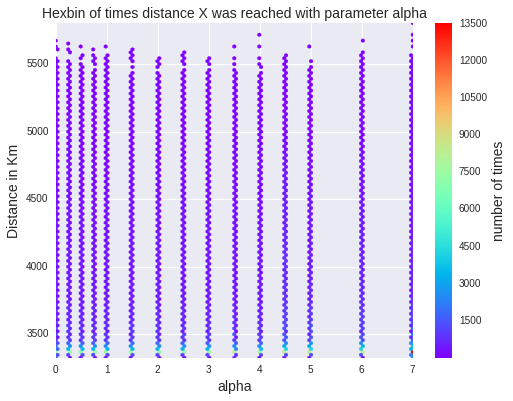

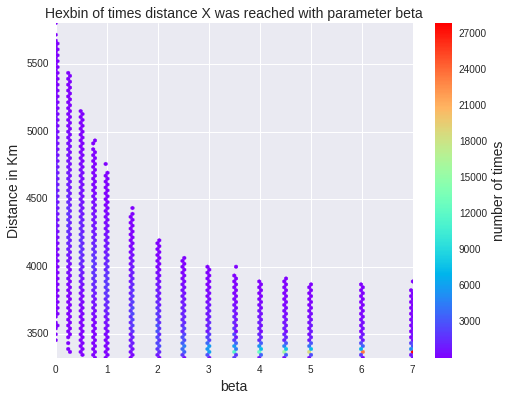

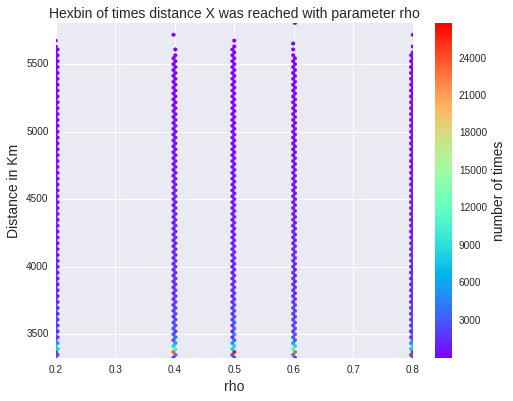

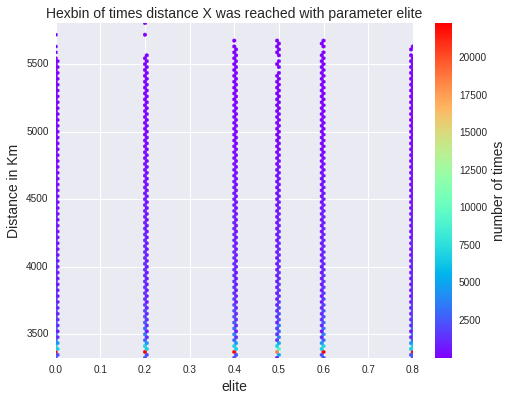

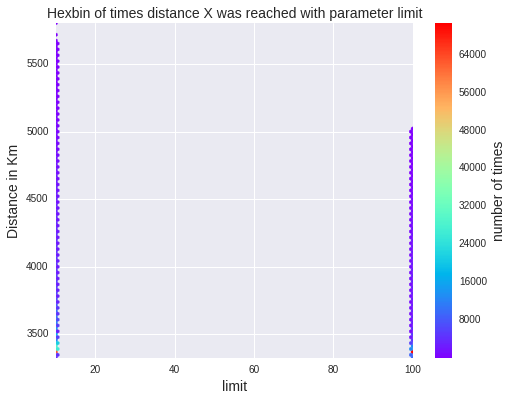

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

for name in clean.columns:
    if name in ['distance','ID','delta','%delta'] :
        continue
    fig, ax = plt.subplots(figsize=(8,6))
    d = ax.hexbin(clean[name],clean['distance'],mincnt=1, cmap=plt.cm.rainbow)
    plt.xlabel(name,fontsize=14)
    plt.ylabel('Distance in Km',fontsize=14)
    plt.title('Hexbin of times distance X was reached with parameter '+name,fontsize=14)
    plt.grid(True)
    cb = fig.colorbar(d)
    cb.set_label('number of times',fontsize=14)
    fig.savefig('img/plot_hexbin_'+name+'.png')


#EAEAF2
#EAEAF2
#EAEAF2
#EAEAF2
#EAEAF2
#EAEAF2


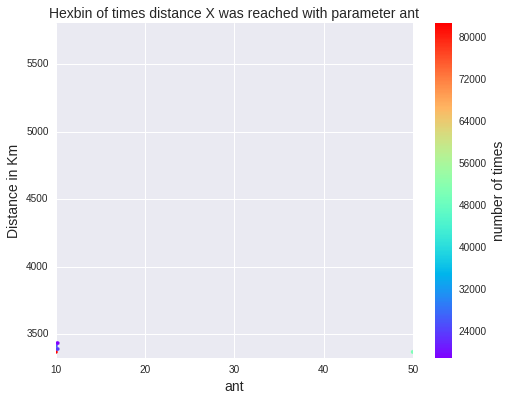

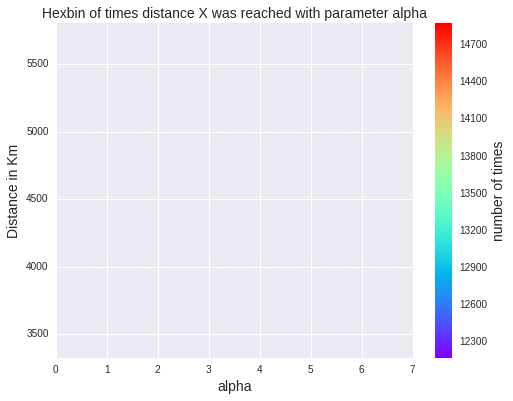

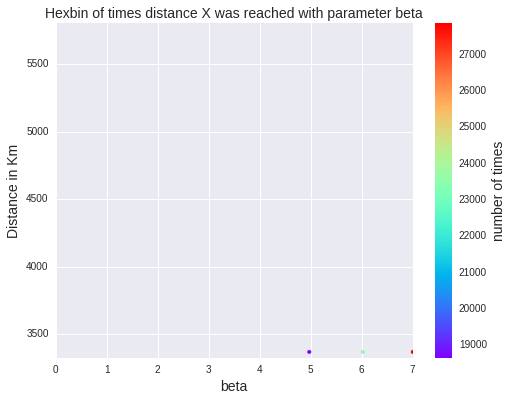

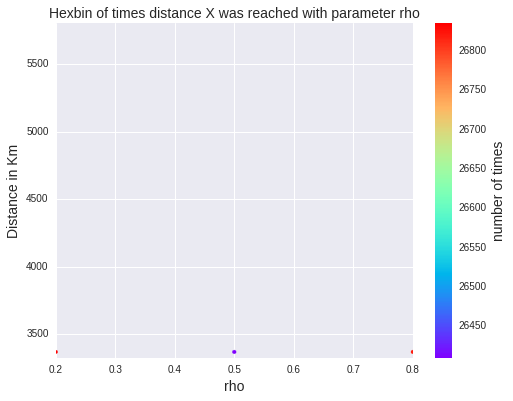

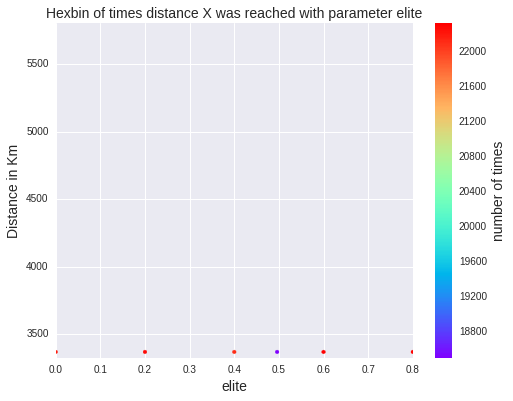

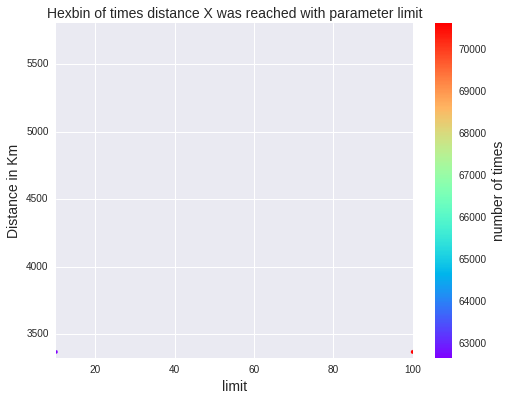

In [39]:
for name in clean.columns:
    if name in ['distance','ID','delta','%delta'] :
        continue
    fig, ax = plt.subplots(figsize=(8,6))
    if name == 'alpha':
        d = ax.hexbin(clean[name],clean['distance'],mincnt=9000, cmap=plt.cm.rainbow)
    elif name == 'rho':
        d = ax.hexbin(clean[name],clean['distance'],mincnt=25000, cmap=plt.cm.rainbow)
    elif name == 'limit':
        d = ax.hexbin(clean[name],clean['distance'],mincnt=48000, cmap=plt.cm.rainbow)
    else:
        d = ax.hexbin(clean[name],clean['distance'],mincnt=18000, cmap=plt.cm.rainbow)
    plt.xlabel(name,fontsize=14)
    plt.ylabel('Distance in Km',fontsize=14)
    plt.title('Hexbin of times distance X was reached with parameter '+name,fontsize=14)
    cb = fig.colorbar(d)
    print(ax.get_axis_bgcolor())
    cb.set_label('number of times',fontsize=14)
    fig.savefig('img/plot_hexbin_10k_'+name+'.png')

C(Q('beta'))[0.0]     4689.728177
C(Q('beta'))[0.25]    4456.251725
C(Q('beta'))[0.5]     4253.640035
C(Q('beta'))[0.75]    4083.388495
C(Q('beta'))[1.0]     3943.412365
C(Q('beta'))[1.5]     3744.356720
C(Q('beta'))[2.0]     3623.280646
C(Q('beta'))[2.5]     3551.341749
C(Q('beta'))[3.0]     3507.464616
C(Q('beta'))[3.5]     3479.685616
C(Q('beta'))[4.0]     3462.331927
C(Q('beta'))[4.5]     3449.854281
C(Q('beta'))[5.0]     3442.295028
C(Q('beta'))[6.0]     3431.674461
C(Q('beta'))[7.0]     3426.487545
C(Q('ant'))[T.50]      -99.052202
dtype: float64
C(Q('beta'))[0.0]     0
C(Q('beta'))[0.25]    0
C(Q('beta'))[0.5]     0
C(Q('beta'))[0.75]    0
C(Q('beta'))[1.0]     0
C(Q('beta'))[1.5]     0
C(Q('beta'))[2.0]     0
C(Q('beta'))[2.5]     0
C(Q('beta'))[3.0]     0
C(Q('beta'))[3.5]     0
C(Q('beta'))[4.0]     0
C(Q('beta'))[4.5]     0
C(Q('beta'))[5.0]     0
C(Q('beta'))[6.0]     0
C(Q('beta'))[7.0]     0
C(Q('ant'))[T.50]     0
dtype: float64
 
spearman correlation distance and ant -0

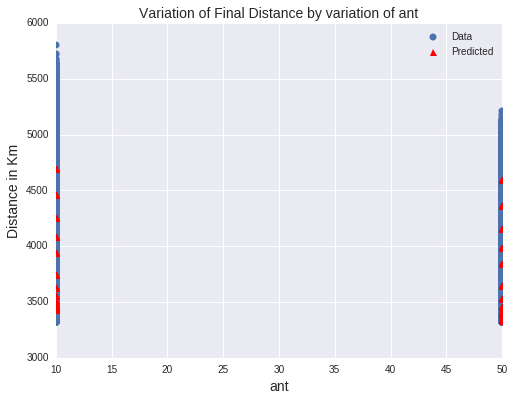

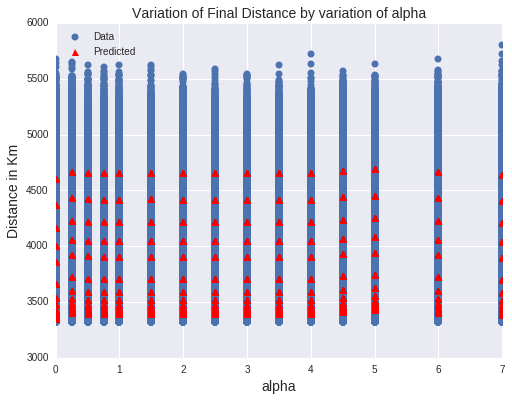

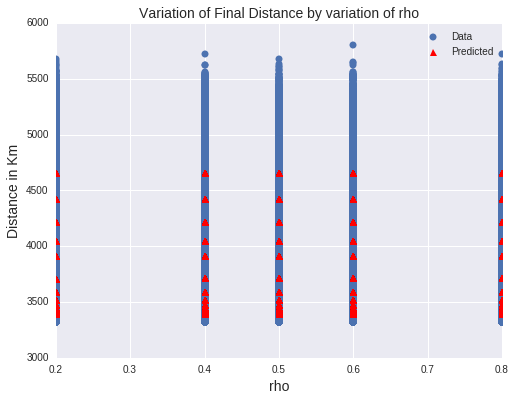

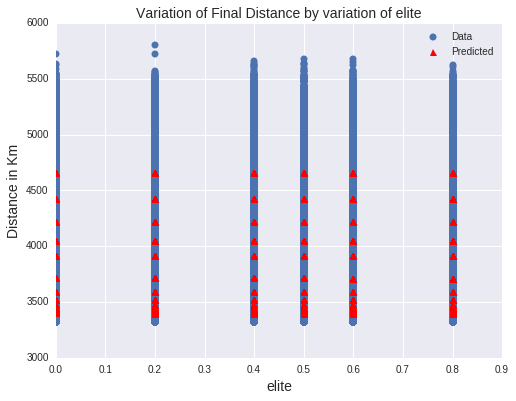

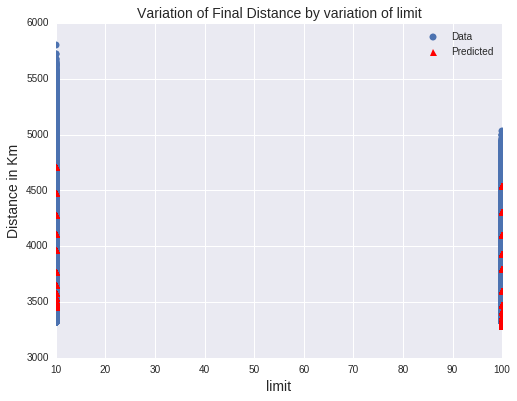

In [30]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

t = []
for name in clean.columns:
    if name in ['distance','ID','beta','delta','%delta'] :
        continue
    
    #formula = "Q('distance') ~ np.exp(Q('beta')) + C(Q('"+name+"'))"
    formula = "Q('distance') ~ C(Q('beta')) + C(Q('"+name+"')) -1"
    model = smf.ols(formula,data=clean)
    if model.nobs < len(clean)/2:
        continue
        
    results = model.fit()
        
    t.append((results.rsquared, name))
    print(results.params)
    print(results.pvalues)
    print(' ')
    print('spearman correlation distance and '+name,clean[name].corr(clean['distance'],method='spearman'))
    print('pearson correlation distance and '+name,clean[name].corr(clean['distance'],method='pearson'))
    print(' ')
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(clean[name], clean['distance'], 'o', label="Data")
    ax.plot(clean[name], results.fittedvalues, '^r', label="Predicted")
    plt.xlabel(name,fontsize=14)
    plt.ylabel('Distance in Km',fontsize=14)
    plt.title('Variation of Final Distance by variation of '+name,fontsize=14)
    plt.grid(True)
    legend = ax.legend(loc="best")
    fig.savefig('plot_'+name+'.png')
    
    
t.sort(reverse=True)
for mse,name in t:
    print(name,mse)

In [33]:
import statsmodels.formula.api as smf
formula1 = 'distance ~ C(beta)-1'
formula2 = 'distance ~ C(beta)+C(ant)-1'
formula3 = 'distance ~ C(beta)+C(limit)-1'
formula4 = 'distance ~ C(beta)+C(limit)+C(ant)-1'
formula5 = 'distance ~ C(beta)+C(limit)+C(ant)+C(alpha)-1'
formula6 = 'distance ~ C(beta)+C(limit)+C(ant)+C(rho)-1'
formula7 = 'distance ~ C(beta)+C(limit)+C(ant)+C(elite)-1'

formulas = [formula1,formula2,formula3,formula4,formula5,formula6,formula7]
t = []
models = {}
for formula in formulas:
    model = smf.ols(formula,data=clean)
    results = model.fit()
        
    t.append((results.rsquared, formula))
    #models[formula] = results.summary
    
t.sort(reverse=True)
for mse,formula in t:
    diff = mse - t[6][0]
    print(formula,mse*100,diff*100)

distance ~ C(beta)+C(limit)+C(ant)+C(alpha)-1 89.0318256093 6.11050905795
distance ~ C(beta)+C(limit)+C(ant)+C(elite)-1 89.0175376338 6.09622108246
distance ~ C(beta)+C(limit)+C(ant)+C(rho)-1 89.0172888588 6.09597230752
distance ~ C(beta)+C(limit)+C(ant)-1 89.0172646967 6.09594814544
distance ~ C(beta)+C(limit)-1 86.1505710345 3.22925448318
distance ~ C(beta)+C(ant)-1 83.9886859166 1.06736936535
distance ~ C(beta)-1 82.9213165513 0.0


In [36]:
model = smf.ols(formula5,data=clean)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                 1.865e+05
Date:                Sun, 07 Feb 2016   Prob (F-statistic):               0.00
Time:                        22:28:13   Log-Likelihood:            -4.4281e+06
No. Observations:              689288   AIC:                         8.856e+06
Df Residuals:                  689257   BIC:                         8.857e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
C(beta)[0.0]      4796.0358      1.008  

In [37]:
model = smf.ols(formula4,data=clean)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                 3.492e+05
Date:                Sun, 07 Feb 2016   Prob (F-statistic):               0.00
Time:                        22:29:48   Log-Likelihood:            -4.4286e+06
No. Observations:              689288   AIC:                         8.857e+06
Df Residuals:                  689271   BIC:                         8.857e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
C(beta)[0.0]     4788.7367      0.694   68

Results for exp beta
C(Q('beta'))[0.0]        4619.104312
C(Q('beta'))[0.25]       4380.253323
C(Q('beta'))[0.5]        4176.395004
C(Q('beta'))[0.75]       4001.415331
C(Q('beta'))[1.0]        3859.501366
C(Q('beta'))[1.5]        3660.872590
C(Q('beta'))[2.0]        3539.325392
C(Q('beta'))[2.5]        3467.743069
C(Q('beta'))[3.0]        3423.151300
C(Q('beta'))[3.5]        3394.894906
C(Q('beta'))[4.0]        3377.172117
C(Q('beta'))[4.5]        3364.617198
C(Q('beta'))[5.0]        3356.950818
C(Q('beta'))[6.0]        3346.031142
C(Q('beta'))[7.0]        3340.634244
C(Q('alpha'))[T.0.25]      59.198425
C(Q('alpha'))[T.0.5]       48.727686
C(Q('alpha'))[T.0.75]      47.148254
C(Q('alpha'))[T.1.0]       47.661044
C(Q('alpha'))[T.1.5]       48.375588
C(Q('alpha'))[T.2.0]       47.655933
C(Q('alpha'))[T.2.5]       47.417563
C(Q('alpha'))[T.3.0]       47.357217
C(Q('alpha'))[T.3.5]       46.700106
C(Q('alpha'))[T.4.0]       47.407588
C(Q('alpha'))[T.4.5]       66.803699
C(Q('alpha'))[T.5

TypeError: 'int' object is not iterable

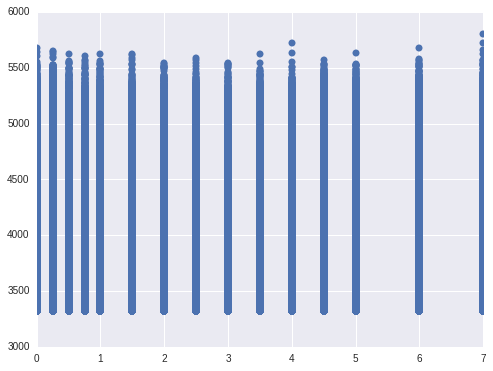

In [186]:

formula = "Q('delta') ~ np.exp(Q('beta'))"
formula = "Q('distance') ~ (C(Q('beta')) - 1) + (C(Q('alpha')) - 1)"

model = smf.ols(formula,data=clean)
results = model.fit()

print('Results for exp beta')
print(results.params)
#print(results.rsquared)
#print(results.pvalues)
print(' ')
print('spearman correlation distance and exp(beta)',np.exp(clean['beta']).corr(clean['distance'],method='spearman'))
print(' ')

betas = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
alpha = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
beta = [(beta,i) for beta in betas for i in alpha]
    
df = pd.DataFrame(beta, columns=['beta','alpha'])
df.head(5)
x = df.loc[df.loc[:,'beta']==0]
print(results.predict(x))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(clean['alpha'], clean['distance'], 'o', label="Data")
for i in alpha:
    x = df.loc[df.loc[:,'beta']==i]
    ax.plot(x['alpha'],results.predict(x) , '^', label="Predicted")
plt.xlabel('exp(beta)',fontsize=14)
plt.ylabel('Distance - Optimal in Km',fontsize=14)
plt.title('Variation of  Delta by variation of exp(beta)',fontsize=14)
plt.grid(True)
legend = ax.legend(loc="best")
fig.savefig('plot_exp(beta).png')


[  1.33188041e+03  -7.61650208e-01]


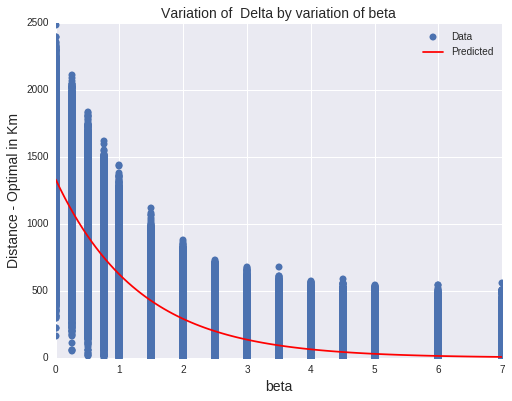

In [273]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * np.exp(b * x)

#p0 = [1292.45,-0.904,71,31]
p0 = [1331.88,-0.762]
#xdata['beta'] = clean[:,'beta':'beta']
#xdata['limit'] = clean.limit.copy()
popt, pcov = curve_fit(func, clean['beta'],clean['delta'],p0=p0 )
print(popt)

x = np.linspace(0,7,100)
y = func(x, *popt)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(clean['beta'],clean['delta'],'o',label='Data')
plt.plot(x,y,'r',label='Predicted')
plt.xlabel('beta',fontsize=14)
plt.ylabel('Distance - Optimal in Km',fontsize=14)
plt.title('Variation of  Delta by variation of beta',fontsize=14)
plt.grid(True)
legend = ax.legend(loc="best")
#plt.savefig('reg_beta_delta.png')


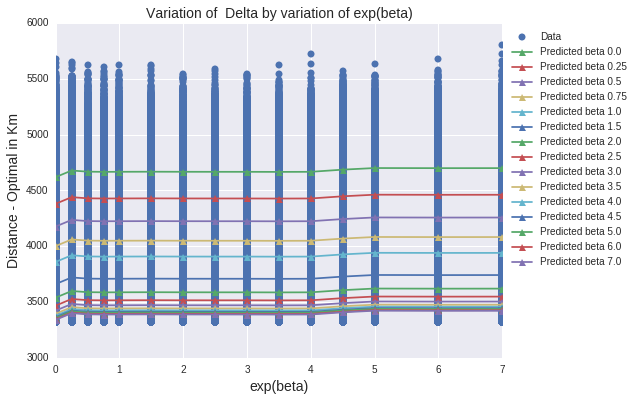

In [202]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(clean['alpha'], clean['distance'], 'o', label="Data")
for beta in betas:
    x = df.loc[df.loc[:,'beta']==beta]
    ax.plot(x['alpha'],results.predict(x) , '^-', label="Predicted beta "+str(beta))
plt.xlabel('exp(beta)',fontsize=14)
plt.ylabel('Distance - Optimal in Km',fontsize=14)
plt.title('Variation of  Delta by variation of exp(beta)',fontsize=14)
plt.grid(True)
legend = ax.legend(loc="upper right",bbox_to_anchor=(1.3, 1.0))
fig.savefig('plot_alpha_beta.png')

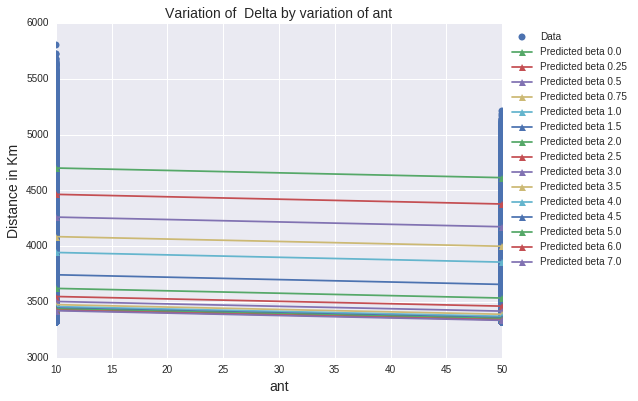

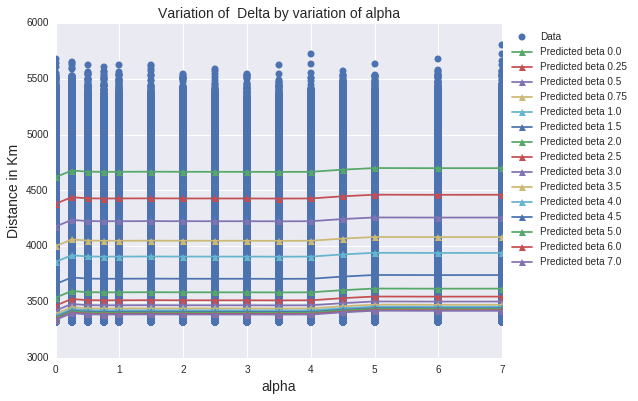

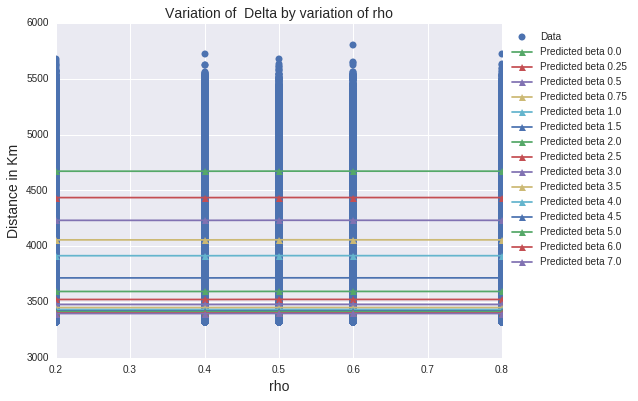

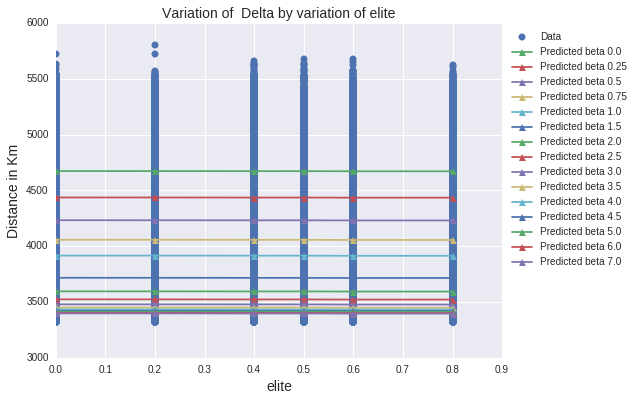

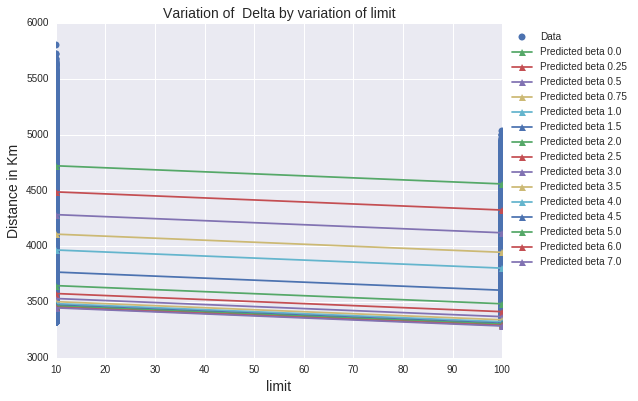

In [5]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

betas = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
alphas = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
ants = np.array((10,50))
limits = np.array((10,100))
rhos = np.array((0.2,0.4,0.5,0.6,0.8))
elites = np.array((0,0.2,0.4,0.5,0.6,0.8))

alpha = [(beta,i) for beta in betas for i in alphas]
ant = [(beta,i) for beta in betas for i in ants]
limit = [(beta,i) for beta in betas for i in limits]
rho = [(beta,i) for beta in betas for i in rhos]
elite = [(beta,i) for beta in betas for i in elites]




dfs = {'alpha':alpha,'ant':ant,'limit':limit,'rho':rho,'elite':elite}

for name in clean.columns:
    if name in ['distance','ID','beta','delta','%delta'] :
        continue
    
    #formula = "Q('distance') ~ np.exp(Q('beta')) + C(Q('"+name+"'))"
    formula = "Q('distance') ~ C(Q('beta')) + C(Q('"+name+"'))"
    model = smf.ols(formula,data=clean)     
    results = model.fit()
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(clean[name], clean['distance'], 'o', label="Data")
    
    df = pd.DataFrame(dfs[name], columns=['beta',name])
    for i in betas:
        x = df.loc[df.loc[:,'beta']==i]
        ax.plot(x[name],results.predict(x) , '^-', label="Predicted beta "+str(i))
    plt.xlabel(name,fontsize=14)
    plt.ylabel('Distance in Km',fontsize=14)
    plt.title('Variation of  Delta by variation of '+name,fontsize=14)
    plt.grid(True)
    legend = ax.legend(loc="upper right",bbox_to_anchor=(1.3, 1.0))
    fig.savefig('plot_'+name+'_beta.png')


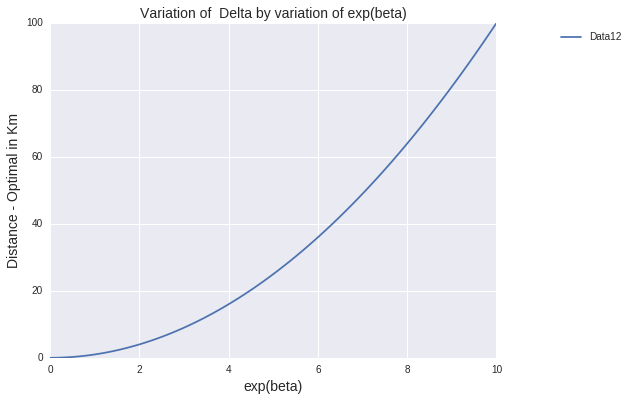

In [198]:
fig, ax = plt.subplots(figsize=(8,6))
x = np.linspace(0,10,100)
y = x**2
ax.plot(x,y, '-', label="Data"+str(12))
plt.xlabel('exp(beta)',fontsize=14)
plt.ylabel('Distance - Optimal in Km',fontsize=14)
plt.title('Variation of  Delta by variation of exp(beta)',fontsize=14)
plt.grid(True)
legend = ax.legend(loc="upper right",bbox_to_anchor=(1.3, 1.0))
fig.savefig('plot_exp(beta).png')

In [279]:
betas = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
alpha = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
beta = [(beta,i) for beta in betas for i in alpha]

j = {'beta':betas,'alpha':alpha}

#df = pd.DataFrame(beta, columns=['beta','alpha'])
#df.head(5)
#x = df.loc[df.loc[:,'beta']==0]

clean.iloc[672290]

ID            12.000000
ant           50.000000
alpha          0.000000
beta           0.000000
rho            0.200000
elite          0.000000
limit        100.000000
distance    4318.000000
delta        995.000000
%delta         0.299428
Name: 694696, dtype: float64